## Linear Regression Example

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
p_df = sns.load_dataset('penguins')

In [3]:
p_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


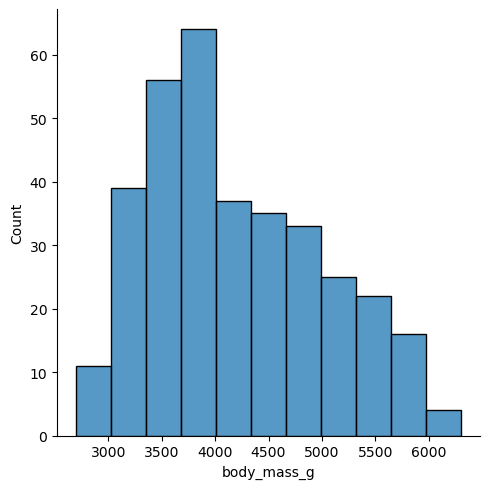

In [4]:
sns.displot(p_df['body_mass_g'])

In [17]:
p_df.dropna(inplace=True)

# XY Split

In [19]:
X = p_df['flipper_length_mm']
y = p_df['body_mass_g']

# test_train Split

In [20]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit((np.array(X_train).reshape(-1,1)))       # find parameters and reshape array / reshape brings into row - column shape
X_train_scaled = scaler.transform((np.array(X_train).reshape(-1,1)))   #transform

# ready for linear regression

In [22]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

model = lm.fit(X_train_scaled, y_train)

In [23]:
model.coef_

array([2974.66093768])

In [24]:
model.intercept_

2752.6341612537126

# test scaled test data with real values, without fit to receive predictions!
# then compare it to real y_test and receive residuals!


In [26]:
X_test_scaled = scaler.transform((np.array(X_test).reshape(-1,1)))

In [27]:
model.predict(X_test_scaled)

array([3055.14205322, 5273.53326098, 3912.24774713, 4063.50169311,
       3760.99380115, 4769.35344104, 5323.95124298, 3912.24774713,
       3811.41178314, 4214.7556391 , 3962.66572912, 4063.50169311,
       4567.68151306, 3811.41178314, 4668.51747705, 3408.06792718,
       3508.90389117, 3760.99380115, 3508.90389117, 4870.18940503,
       3962.66572912, 3660.15783716, 5576.04115295, 4315.59160309,
       3206.39599921, 3559.32187317, 4819.77142303, 4819.77142303,
       3206.39599921, 5626.45913495, 3508.90389117, 5676.87711694,
       4063.50169311, 4265.17362109, 5676.87711694, 4618.09949505,
       3912.24774713, 4567.68151306, 3660.15783716, 3458.48590918,
       3206.39599921, 3660.15783716, 4164.3376571 , 4113.91967511,
       3609.73985516, 3508.90389117, 5223.11527899, 3559.32187317,
       3660.15783716, 5122.279315  , 3760.99380115, 5021.44335101,
       4718.93545904, 3155.97801721, 3710.57581915, 5172.697297  ,
       3256.8139812 , 3912.24774713, 3962.66572912, 4315.59160

In [28]:
y_pred = model.predict(X_test_scaled)

In [29]:
residuals = (y_test - y_pred)

In [32]:
res_df = pd.DataFrame({'y_test': y_test,'y_pred': y_pred,'residual': residuals})

In [31]:
res_df.head()

,y_test,y_pred,residual
30,3250.0,3055.142053,194.857947
317,4875.0,5273.533261,-398.533261
79,4000.0,3912.247747,87.752253
201,3675.0,4063.501693,-388.501693
63,4050.0,3760.993801,289.006199


# MSE

In [33]:
from sklearn.metrics import mean_squared_error as mse

mse(y_test,y_pred)  # mean squared error

129886.71972544753

In [34]:
rmse = np.sqrt(mse(y_test,y_pred))  #root mean squared error

360.398001833317